# __The Battle of Neighborhoods__  *Introduction / Project Description*

<br/>

From module 3, both the Peer-Graded Assigment and the Lab introduced the exploration of venues and the use of postal codes to explore the neighborhoods of New York and Toronto. From the data, these cities show and have a dense yet diverse cultural background. However, which city is more diverse in terms of having a multicultural background? My Capstone Project for this Course, Applied Data Science Capstone, will revolve around the question above, comparing the two cities (New York and Toronto) based on its cultural variety.

<br/>

___

<br/>

# __The Battle of Neighborhoods__ *Background and Methods for:[Data]*

<br/>

To incorporate the use of FourSquare API and its Venue Searching Capabilities around the city neighborhood, I will be specifically looking for food venues in the city. In addition to the Postal Code Data and the Borough/Neighborhoods's respective Latitude and Longitude Values in place for both New York City and Toronto, my project will take into account the population of each city, the land area of each city, and the amount of Boroughs each city has. To be specific, my project will be mainly revolved around FourSquare APIs Search Option for CategoryID. The CategoryID for Food, which is 4d4b7105d754a06374d81259, will be used to create a DataFrame that consists of the types of venues for Restaurants. By using Restaurants, we can gain a better understanding of both city's historical backgrounds on Food and put that into consideration for which city has a more multicultural background. And if the Search Option for Foods gives too many broad category types for venues, my project will specify the type of cuisine to look for. From the amount of culturally diverse restaurants and the comparison to the population and size of the city, it will be safer to say which city (New York or Toronto) is more culturally diverse.

<br/>

___

<br/>



# __The Battle of Neighborhoods__ *Methodology*

<br/>

For the Data Analysis/Calculation Section of my Notebook, I used visualizations that compared the data between Toronto and New York City. With a Bar Chart I was able to compare the counts of the top 10 types of Restaurant Cuisines in Toronto and New York City. For clarification, I used FourSquare API's CategoryID search option for the types of cuisines. As for the analysis, I applied K Means Clustering to both datasets and found the most optimal K value for each city. From the observations and the definition that multicultural means relating to or constituting several cultural or ethnic groups within a society, I was able to deduce which city is considered more culturally diverse or has a larger multicultural background.

<br/>

___

<br/>

# __The Battle of Neighborhoods__ *Results*

<br/>

The bar chart commparing the counts of the top 10 types of Restaurant Cuisines in Toronto showed an overwhelming dominance by New York City. The top type of Restaurant cuisine was Italian Restaurants and New York City beat Toronto of a score of 958 venues to a mere 181 venues in Toronto. However, for each type of cuisine following Italian Restaurants, New York City dropped by a significant amount of venues, while Toronto mainly stayed the same. 

<br/>

Interestingly enough, the K Means Clustering on both the cities showed something different. The optimal k value for Toronto was 16, which means 14 center clusters, while New York City's optiaml k value was 14, 2 center cluster points lower than Toronto.

<br/>

___

<br/>

# __The Battle of Neighborhoods__ *Discussion*

<br/>

Based on the unique data values for the Category Names of the Types of Restaurants, it is safe to say that New York is more culturally diverse as it has 20-25 more unique Category Name/Cuisines. 

<br/>

From the bar chart, Toronto isn't too far off New York in terms of having a multicultural background. The fact is that the Top 10 Restaurant Cuisines for Toronto were very evenly distributed in terms of number of venues. However, this doens't mean that Toronto is more diverse than New York City. New York City clearly outnumbers Toronto in more diversity and number.

<br/>

As for the k Means Clusters, the fact that Toronto has 2 more center clusters doesn't mean that its more diverse. This is because New York City is denser than Toronto and that New York City has distinct clusters for a specific type of culture. Yes, I know that Toronto also has a Little Italy and a Chinatown, but the scale of it can't compare to the Chinatown and Little Italy of New York City. Because of such a large and dense gathering of culture, New York City would be bound to have lower value of optimal K (number of clusters).

<br/>

It is safe to say that from the discussion of the data analysis that New York City is more culturally diverse and has a larger cultural background than Toronto.

<br/>

___

<br/>

# __The Battle of Neighborhoods__ *Calculation/Code*

<br/>

<br/>

___

<br/>

<br/>

## __Getting Postal Code Values of Toronto__

<br/>

___


<br/>

### To start, import necessary packages and download Pandas=1.0.1. for newest functionalities.

<br/>

In [0]:
!pip3 -q install pandas==1.0.1.
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

<br/>

### Web Scrap for the List of Postal Codes of Canada using __Beautiful Soup__ with *html.parser*

<br/>

In [0]:
url = "http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
postal_codes_canada  = requests.get(url)
soup = BeautifulSoup(postal_codes_canada.text, 'html.parser')
table = soup.find('table', {'class':'wikitable sortable'}).tbody

<br/>

### Find Columns Headers of Table

<br/>

In [0]:
column_headers = table.find_all('th')
column_headers = [c.text.replace('\n', '') for c in column_headers]
print(column_headers)

['Postcode', 'Borough', 'Neighbourhood']


<br/>

### Set Columns Headers of Table to a new DataFrame: __df_postal_codes__. Then, print the column headers.

<br/>

In [0]:
df_postal_codes = pd.DataFrame(columns = column_headers)
df_postal_codes.head()

,Postcode,Borough,Neighbourhood


<br/>

### Scrape for the column data in the table. Append the scraped data into the DataFrame and organize the DataFrame.

<br/>

In [0]:
  num_rows = table.find_all('tr')
  for i in range(1,len(num_rows)):
    rows = num_rows[i].find_all('td')
    row = [rows[0].text, rows[1].text, rows[2].text.replace('\n','')] 
    if rows[2].text.replace('\n','') == 'Not assigned' and rows[1].text != 'Not assigned':
      row = [rows[0].text, rows[1].text, rows[1].text] 
      df_postal_codes = df_postal_codes.append(pd.Series(row, index = column_headers), ignore_index = True)
    elif rows[1].text != 'Not Assigned' and rows[2].text.replace('\n','') != 'Not assigned':
      row = [rows[0].text, rows[1].text, rows[2].text.replace('\n','')]
      df_postal_codes = df_postal_codes.append(pd.Series(row, index = column_headers), ignore_index = True)
      if i != 1 and row[0] == row_prev[0]:
        row = [rows[0].text, rows[1].text, rows[2].text.replace('\n','') + ", " + row_prev[2]]
        df_postal_codes = df_postal_codes.append(pd.Series(row, index = column_headers), ignore_index = True)
    row_prev = row

<br/>

### Remove Duplicate Rows with the same __Postcode__

<br/>

In [0]:
df_postal_codes.drop_duplicates(subset = ['Postcode'], keep = 'last', inplace = True, ignore_index = True)

<br/>

### Show the DataFrame, __df_postal_codes__.

<br/>

In [0]:
df_postal_codes

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,Queen's Park
...,...,...,...
98,M8X,Etobicoke,"Old Mill North, Montgomery Road, The Kingsway"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern
101,M8Y,Etobicoke,"Sunnylea, Royal York South East, The Queensway..."


<br/>

### Print Number of Rows using the __.shape__ method.

<br/>

In [0]:
df_postal_codes.shape

(103, 3)

<br/>

## __Adding in Geospatial Data (Latitude and Longitude) for Toronto__

<br/>

___

<br/>

### Read CSV and Data Values for Geospatial Data. And print First 20 Rows in the DataFrame, __df_geo_coords__.

<br/>

In [0]:
df_geo_coords = pd.read_csv("http://cocl.us/Geospatial_data")
df_geo_coords.head(20)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


<br/> 

### Retrieve Latitude and Longitude Values from DataFrame, __df_geo_coords__.

<br/>

In [0]:
latitude = np.zeros([len(df_postal_codes)])
longitude = np.zeros([len(df_postal_codes)])
n = 0

for i in df_postal_codes['Postcode']:
  for c in df_geo_coords['Postal Code']:
    if i==c:
      latitude[n] = df_geo_coords.loc[df_geo_coords['Postal Code'] == c].get('Latitude')
      longitude[n] = df_geo_coords.loc[df_geo_coords['Postal Code'] == c].get('Longitude')
      n += 1

<br/>

### Add Latitude and Longitude Values to DataFrame, __df_postal_codes__, as new Columns

<br/>

In [0]:
df_postal_codes['Latitude'] = latitude
df_postal_codes['Longitude'] = longitude
df_toronto = df_postal_codes

<br/>

### Display the Updated DataFrame, __df_postal_codes__.

<br/>

In [0]:
df_toronto

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"Old Mill North, Montgomery Road, The Kingsway",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
101,M8Y,Etobicoke,"Sunnylea, Royal York South East, The Queensway...",43.636258,-79.498509


<br/>

## __Getting Postal Code Values and Geospatial Data (Latitude and Longitude) in New York City__

<br/>

___

<br/>

### Import necessary Packages for this portion.

<br/>

In [0]:
import json
from pandas.io.json import json_normalize

<br/>

### Retrieve the Data for Postal Codes and Geospatial Data in New York City

<br/>

In [0]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

<br/>

### Transform and Reorganize JSON file from previous cell into a Pandas DataFrame

<br/>

In [0]:
neighborhoods_data = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
df_newyorkcity = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    df_newyorkcity = df_newyorkcity.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

<br/>

### Display the Updated DataFrame, __df_newyorkcity__.

<br/>

In [0]:
df_newyorkcity

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


<br/>

## __Defining Foursquare Credentials and Version__

<br/>

___

In [0]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' 

print('Foursquare credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

<br/>

## __Exploring Nearby Venues__ *(Defining the Function)*

<br/>

___

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 500
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        asian_restaurants = '4bf58dd8d48988d142941735'
        australian_restaurants = '4bf58dd8d48988d169941735'
        austrian_restaurants = '52e81612bcbc57f1066b7a01'
        bangladeshi_restaurants = '5e179ee74ae8e90006e9a746'
        belgian_restaurants = '52e81612bcbc57f1066b7a02'
        carribean_restaurants = '4bf58dd8d48988d144941735'
        caucassian_restaurants = '5293a7d53cf9994f4e043a45'
        czech_restaurants = '52f2ae52bcbc57f1066b8b81'
        dumpling = '4bf58dd8d48988d108941735'
        dutch_restaurants = '5744ccdfe4b0c0459246b4d0'
        eastern_european_restaurants = '4bf58dd8d48988d109941735'
        english_restaurants = '52e81612bcbc57f1066b7a05'
        french_restaurants = '4bf58dd8d48988d10c941735'
        german_restaurants = '4bf58dd8d48988d10d941735'
        greek_restaurants = '4bf58dd8d48988d10e941735'
        halal_restaurants = '52e81612bcbc57f1066b79ff'
        hungarian_restaurants = '52e81612bcbc57f1066b79fa'
        haiwaiian_restaurants = '52e81612bcbc57f1066b79fe'
        indian_restaurants = '4bf58dd8d48988d10f941735'
        italian_restaurants = '4bf58dd8d48988d110941735'
        jewish_restaurants = '52e81612bcbc57f1066b79fd'
        latin_american_restaurants = '4bf58dd8d48988d1be941735'
        mediterranean_restaurants = '4bf58dd8d48988d1c0941735'
        mexican_restaurants = '4bf58dd8d48988d1c1941735'
        middle_eastern_restaurants = '4bf58dd8d48988d115941735'
        pakistani_restaurants = '52e81612bcbc57f1066b79f8'
        polish_restaurant = '52e81612bcbc57f1066b7a04'
        portuguese_restaurant = '4def73e84765ae376e57713a'
        russian_restaurant = '5293a7563cf9994f4e043a44'
        scandinavian_restaurant = '4bf58dd8d48988d1c6941735'
        scottish_restaurant = '5744ccdde4b0c0459246b4a3'
        slovak_restaurant = '56aa371be4b08b9a8d57355a'
        spanish_restaurant = '4bf58dd8d48988d150941735'
        turkish_restaurant = '4f04af1f2fb6e1c99f3db0bb'
        ukranian_restaurant = '52e928d0bcbc57f1066b7e96'

            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            asian_restaurants,
            australian_restaurants,
            austrian_restaurants,
            bangladeshi_restaurants,
            belgian_restaurants,
            carribean_restaurants,
            caucassian_restaurants,
            czech_restaurants,
            dumpling,
            dutch_restaurants,
            eastern_european_restaurants,
            english_restaurants,
            french_restaurants,
            german_restaurants,
            greek_restaurants,
            halal_restaurants,
            hungarian_restaurants,
            haiwaiian_restaurants,
            indian_restaurants,
            italian_restaurants,
            jewish_restaurants,
            latin_american_restaurants,
            mediterranean_restaurants,
            mexican_restaurants,
            middle_eastern_restaurants,
            pakistani_restaurants,
            polish_restaurant,
            portuguese_restaurant,
            russian_restaurant,
            scandinavian_restaurant,
            scottish_restaurant,
            slovak_restaurant,
            spanish_restaurant,
            turkish_restaurant,
            ukranian_restaurant)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue CategoryID', 
                  'Venue Category']
    
    return(nearby_venues)

<br/>

## __Search Venues in Toronto__

<br/>

___

<br/>

### Use the Function __getNearbyVenues__ to retrieve Toronto Venues

<br/>

In [0]:
toronto_venues = getNearbyVenues(names=df_postal_codes['Neighbourhood'],
                                   latitudes=df_postal_codes['Latitude'],
                                   longitudes=df_postal_codes['Longitude']
                                  )

<br/>

### Display the DataFrame that has Toronto Venue Information

<br/>

In [0]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue CategoryID,Venue Category
0,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,"{'id': '4def73e84765ae376e57713a', 'name': 'Po...",Portuguese Restaurant
1,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,"{'id': '4bf58dd8d48988d10c941735', 'name': 'Fr...",French Restaurant
2,Harbourfront,43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,"{'id': '4bf58dd8d48988d10c941735', 'name': 'Fr...",French Restaurant
3,Harbourfront,43.654260,-79.360636,Cocina Economica,43.654959,-79.365657,"{'id': '4bf58dd8d48988d1c1941735', 'name': 'Me...",Mexican Restaurant
4,Harbourfront,43.654260,-79.360636,El Catrin,43.650601,-79.358920,"{'id': '4bf58dd8d48988d1c1941735', 'name': 'Me...",Mexican Restaurant
...,...,...,...,...,...,...,...,...
1427,Church and Wellesley,43.665860,-79.383160,Kenzo Japanese Noodle House,43.663702,-79.384053,"{'id': '55a59bace4b013909087cb24', 'name': 'Ra...",Ramen Restaurant
1428,Church and Wellesley,43.665860,-79.383160,Tea Shop 168,43.669595,-79.386406,"{'id': '52e81612bcbc57f1066b7a0c', 'name': 'Bu...",Bubble Tea Shop
1429,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Chino Locos,43.664653,-79.325584,"{'id': '4bf58dd8d48988d153941735', 'name': 'Bu...",Burrito Place
1430,"South of Bloor, Royal York South West, The Que...",43.628841,-79.520999,Ricco's Plum Tomato,43.632760,-79.518120,"{'id': '4bf58dd8d48988d110941735', 'name': 'It...",Italian Restaurant


In [0]:
toronto_venues['Venue Category'].unique()

array(['Portuguese Restaurant', 'French Restaurant', 'Mexican Restaurant',
       'Greek Restaurant', 'Asian Restaurant', 'Italian Restaurant',
       'Mediterranean Restaurant', 'Chinese Restaurant',
       'Thai Restaurant', 'Sushi Restaurant', 'Japanese Restaurant',
       'Middle Eastern Restaurant', 'Indian Restaurant', 'Burrito Place',
       'Burger Joint', 'Halal Restaurant', 'Fast Food Restaurant',
       'Korean Restaurant', 'Ramen Restaurant', 'Taiwanese Restaurant',
       'Caribbean Restaurant', 'Pub', 'Vietnamese Restaurant',
       'Sandwich Place', 'Ice Cream Shop', 'Restaurant', 'Noodle House',
       'Dessert Shop', 'Dumpling Restaurant', 'Bar', 'Tapas Restaurant',
       'Fried Chicken Joint', 'Hotel', 'Grocery Store',
       'Filipino Restaurant', 'Dim Sum Restaurant', 'Hakka Restaurant',
       'Latin American Restaurant', 'German Restaurant',
       'Eastern European Restaurant', 'Polish Restaurant',
       'Belgian Restaurant', 'Poke Place', 'Jazz Club', 'Butcher

<br/>

### Remove Index Values if the Venue Category name has string __"Restaurant"__ or __"Place"__ *This is because some of the venues are ice cream shops or bbq joints, which don't have a specific culture related to it*

<br/>

In [0]:
toronto_venues_unique = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant", "Place")]

<br/>

### Display the unique values in the updated DataFrame with Category Names __"Restaurant"__ and __"Place"__ Removed

<br/>

In [0]:
toronto_venues_unique['Venue Category'].unique()

array(['Portuguese Restaurant', 'French Restaurant', 'Mexican Restaurant',
       'Greek Restaurant', 'Asian Restaurant', 'Italian Restaurant',
       'Mediterranean Restaurant', 'Chinese Restaurant',
       'Thai Restaurant', 'Sushi Restaurant', 'Japanese Restaurant',
       'Middle Eastern Restaurant', 'Indian Restaurant',
       'Halal Restaurant', 'Fast Food Restaurant', 'Korean Restaurant',
       'Ramen Restaurant', 'Taiwanese Restaurant', 'Caribbean Restaurant',
       'Vietnamese Restaurant', 'Restaurant', 'Dumpling Restaurant',
       'Tapas Restaurant', 'Filipino Restaurant', 'Dim Sum Restaurant',
       'Hakka Restaurant', 'Latin American Restaurant',
       'German Restaurant', 'Eastern European Restaurant',
       'Polish Restaurant', 'Belgian Restaurant', 'Spanish Restaurant',
       'Moroccan Restaurant', 'North Indian Restaurant',
       'Peking Duck Restaurant', 'Vegetarian / Vegan Restaurant',
       'Brazilian Restaurant', 'Hawaiian Restaurant',
       'Australian Re

<br/>

### Remove Index Values if the Venue Category name has string __"Food"__  *This is because Fast Food and Comfort Food Restaurants don't relate to a specific culture*

<br/>

In [0]:
toronto_venues_filtered = toronto_venues_unique[~toronto_venues_unique['Venue Category'].str.contains('Food')]

<br/>

### Display the unique values in the updated DataFrame with Category Names __"Food"__ Removed and print the amount of unique Restaurants in Toronto.

<br/>

In [0]:
toronto_venues_filtered['Venue Category'].unique()
print("There are",len(toronto_venues_filtered['Venue Category'].unique()), "unique types of Restaurants in Toronto.")

There are 51 unique types of Restaurants in Toronto.


<br/>

### Display data of the count/number of each unique type of Restaurant in Toronto

<br/>

In [0]:
toronto_restaurants = toronto_venues_filtered['Venue Category'].value_counts()

<br/>

## __Search Venues in New York City__

<br/>

___

<br/>

### Use the Function __getNearbyVenues__ to retrieve New York City Venues

<br/>

In [0]:
newyorkcity_venues = getNearbyVenues(names=df_newyorkcity['Neighborhood'],
                                   latitudes=df_newyorkcity['Latitude'],
                                   longitudes=df_newyorkcity['Longitude']
                                  )

<br/>

### Display the DataFrame that has New York City Venue Information

<br/>

In [0]:
newyorkcity_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue CategoryID,Venue Category
0,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,"{'id': '4bf58dd8d48988d144941735', 'name': 'Ca...",Caribbean Restaurant
1,Wakefield,40.894705,-73.847201,Pastele Factory,40.898787,-73.848338,"{'id': '4bf58dd8d48988d150941735', 'name': 'Sp...",Spanish Restaurant
2,Co-op City,40.874294,-73.829939,Guang Hui Chinese Restaurant,40.876651,-73.829092,"{'id': '4bf58dd8d48988d145941735', 'name': 'Ch...",Chinese Restaurant
3,Eastchester,40.887556,-73.827806,Fish & Ting,40.885656,-73.829197,"{'id': '4bf58dd8d48988d144941735', 'name': 'Ca...",Caribbean Restaurant
4,Eastchester,40.887556,-73.827806,Golden Krust Caribbean Restaurant,40.888488,-73.831083,"{'id': '4bf58dd8d48988d144941735', 'name': 'Ca...",Caribbean Restaurant
...,...,...,...,...,...,...,...,...
6547,Fox Hills,40.617311,-74.081740,Rinconcito Dominicano LLC,40.618367,-74.085149,"{'id': '4bf58dd8d48988d150941735', 'name': 'Sp...",Spanish Restaurant
6548,Fox Hills,40.617311,-74.081740,New pheonix,40.616438,-74.085646,"{'id': '4bf58dd8d48988d145941735', 'name': 'Ch...",Chinese Restaurant
6549,Fox Hills,40.617311,-74.081740,Chan Shu Hong Chinese Restaurant,40.615059,-74.084619,"{'id': '4bf58dd8d48988d145941735', 'name': 'Ch...",Chinese Restaurant
6550,Fox Hills,40.617311,-74.081740,China Garden,40.614410,-74.084455,"{'id': '4bf58dd8d48988d145941735', 'name': 'Ch...",Chinese Restaurant


<br/>

### Display the Unique Venues in New York City

<br/>

In [0]:
newyorkcity_venues['Venue Category'].unique()

array(['Caribbean Restaurant', 'Spanish Restaurant', 'Chinese Restaurant',
       'Latin American Restaurant', 'Mexican Restaurant',
       'Italian Restaurant', 'Asian Restaurant', 'Indian Restaurant',
       'Empanada Restaurant', 'Sushi Restaurant', 'Thai Restaurant',
       'French Restaurant', 'Tapas Restaurant', 'Halal Restaurant',
       'Dim Sum Restaurant', 'Greek Restaurant', 'American Restaurant',
       'Korean Restaurant', 'Taco Place', 'German Restaurant',
       'South American Restaurant', 'Portuguese Restaurant',
       'Supermarket', 'Mediterranean Restaurant',
       'South Indian Restaurant', 'Indian Chinese Restaurant',
       'Tanning Salon', 'Middle Eastern Restaurant',
       'Eastern European Restaurant', 'Japanese Restaurant',
       'Cuban Restaurant', 'Caucasian Restaurant',
       'Vietnamese Restaurant', 'Souvlaki Shop', 'Noodle House',
       'Russian Restaurant', 'Dumpling Restaurant', 'Cha Chaan Teng',
       'Shabu-Shabu Restaurant', 'Hotpot Restaurant

<br/>

### Remove Index Values if the Venue Category name has string __"Restaurant"__ or __"Place"__ *This is because some of the venues are ice cream shops or bbq joints, which don't have a specific culture related to it*

<br/>

In [0]:
newyorkcity_venues_unique = newyorkcity_venues[newyorkcity_venues['Venue Category'].str.contains("Restaurant", "Place")]

<br/>

### Display the unique values in the updated DataFrame with Category Names __"Restaurant"__ and __"Place"__ Removed

<br/>

In [0]:
newyorkcity_venues_unique['Venue Category'].unique()

array(['Caribbean Restaurant', 'Spanish Restaurant', 'Chinese Restaurant',
       'Latin American Restaurant', 'Mexican Restaurant',
       'Italian Restaurant', 'Asian Restaurant', 'Indian Restaurant',
       'Empanada Restaurant', 'Sushi Restaurant', 'Thai Restaurant',
       'French Restaurant', 'Tapas Restaurant', 'Halal Restaurant',
       'Dim Sum Restaurant', 'Greek Restaurant', 'American Restaurant',
       'Korean Restaurant', 'German Restaurant',
       'South American Restaurant', 'Portuguese Restaurant',
       'Mediterranean Restaurant', 'South Indian Restaurant',
       'Indian Chinese Restaurant', 'Middle Eastern Restaurant',
       'Eastern European Restaurant', 'Japanese Restaurant',
       'Cuban Restaurant', 'Caucasian Restaurant',
       'Vietnamese Restaurant', 'Russian Restaurant',
       'Dumpling Restaurant', 'Shabu-Shabu Restaurant',
       'Hotpot Restaurant', 'Cantonese Restaurant', 'Arepa Restaurant',
       'Colombian Restaurant', 'Polish Restaurant', 'Rame

<br/>

### Remove Index Values if the Venue Category name has string __"Food"__  *This is because Fast Food and Comfort Food Restaurants don't relate to a specific culture*

<br/>

In [0]:
newyorkcity_venues_filtered = newyorkcity_venues_unique[~newyorkcity_venues_unique['Venue Category'].str.contains('Food')]

<br/>

### Display the unique values in the updated DataFrame with Category Names __"Food"__ Removed and print the amount of unique Restaurants in New York City.

<br/>

In [0]:
newyorkcity_venues_filtered['Venue Category'].unique()
print("There are",len(newyorkcity_venues_filtered['Venue Category'].unique()), "unique types of Restaurants in New York City.")

There are 84 unique types of Restaurants in New York City.


<br/>

### Display data of the count/number of each unique type of Restaurant in New York City.

<br/>

In [0]:
newyorkcity_restaurants = newyorkcity_venues_filtered['Venue Category'].value_counts()

<br/>

## __Comparing New York City to Toronto__ ##

<br/>

___

<br/>

### Define the size and population of both Toronto and New York City in terms of mi^2 and number of ppl respectively

<br/>

In [0]:
newyorkcity_size = 302.6 # mi^2
toronto_size = 243.3 # mi^2
newyorkcity_pop = 8623000 # approx 8.623 million
toronto_pop = 2930000 # approx 2.93 million

<br/>

### Find population density of each city

<br/>

In [0]:
newyorkcity_density = newyorkcity_pop/newyorkcity_size  # Ppl per mi^2
toronto_density = toronto_pop/toronto_size  # Ppl per mi^2 

print("There are", newyorkcity_density,"ppl per square mile in New York City")
print("There are", toronto_density,"ppl per square mile in Toronto")

There are 28496.364838070058 ppl per square mile in New York City
There are 12042.745581586518 ppl per square mile in Toronto


<br/>

### Number of Restaurant Venues with a particular Cuisine Type per square mi^2

<br/>

In [0]:
nyc_restaurant_density = len(newyorkcity_venues_filtered)/newyorkcity_size  # Veneus per mi^2
toronto_restaurant_density = len(toronto_venues_filtered)/toronto_size  # Venues per mi^2
print("There are", nyc_restaurant_density,"Restaurant Venues per square mile in New York City")
print("There are", toronto_restaurant_density,"Restaurant Venues per square mile in Toronto")

There are 20.152015862524784 Restaurant Venues per square mile in New York City
There are 5.318536785861077 Restaurant Venues per square mile in Toronto


<br/>

## __Plotting for Observation and Analysis__

<br/>

___

<br/>

### Import Package to Create Graphs (e.g Bar Chart)

<br/>

In [0]:
import matplotlib.pyplot as plt

<br/>

### Create DataFrames from __toronto_restaurants__ and __newyorkcity_restaurants__. Then add a column header 'CategoryID' for the index of the DataFrames.

<br/>

In [0]:
toronto_restaurants = pd.DataFrame(toronto_restaurants)
newyorkcity_restaurants = pd.DataFrame(newyorkcity_restaurants)
toronto_restaurants['CategoryID'] = toronto_restaurants.index
newyorkcity_restaurants['CategoryID'] = newyorkcity_restaurants.index

<br/>

### Merge the two DataFrames, __toronto_restaurants__ and __newyorkcity_restaurants__.

<br/>

In [0]:
df_merge_restaurants= pd.merge(toronto_restaurants, newyorkcity_restaurants, on='CategoryID', how= 'outer')

<br/>

### Organize and Rename the Column Headers of merged DataFrame.

<br/>

In [0]:
df_merge_restaurants.columns = df_merge_restaurants.columns.str.replace('Venue Category_x','Toronto Restaurants')
df_merge_restaurants.columns = df_merge_restaurants.columns.str.replace('Venue Category_y','New York City Restaurants')
df_merge_restaurants = df_merge_restaurants[['CategoryID', 'Toronto Restaurants', 'New York City Restaurants']]
df_merge_restaurants = df_merge_restaurants.fillna(0)

<br/>

### Display the Merged DataFrame with its new and organized Column Headers

<br/>

In [0]:
df_merge_restaurants

,CategoryID,Toronto Restaurants,New York City Restaurants
0,Italian Restaurant,181.0,958.0
1,Asian Restaurant,126.0,386.0
2,Chinese Restaurant,119.0,935.0
3,Sushi Restaurant,108.0,244.0
4,Japanese Restaurant,101.0,228.0
...,...,...,...
83,Theme Restaurant,0.0,1.0
84,Egyptian Restaurant,0.0,1.0
85,Falafel Restaurant,0.0,1.0
86,Hunan Restaurant,0.0,1.0


<br/>

### Make a Bar Chart Comparing the Counts of the Top 10 most Popular Cuisine Types in Toronto and New York City

<br/>

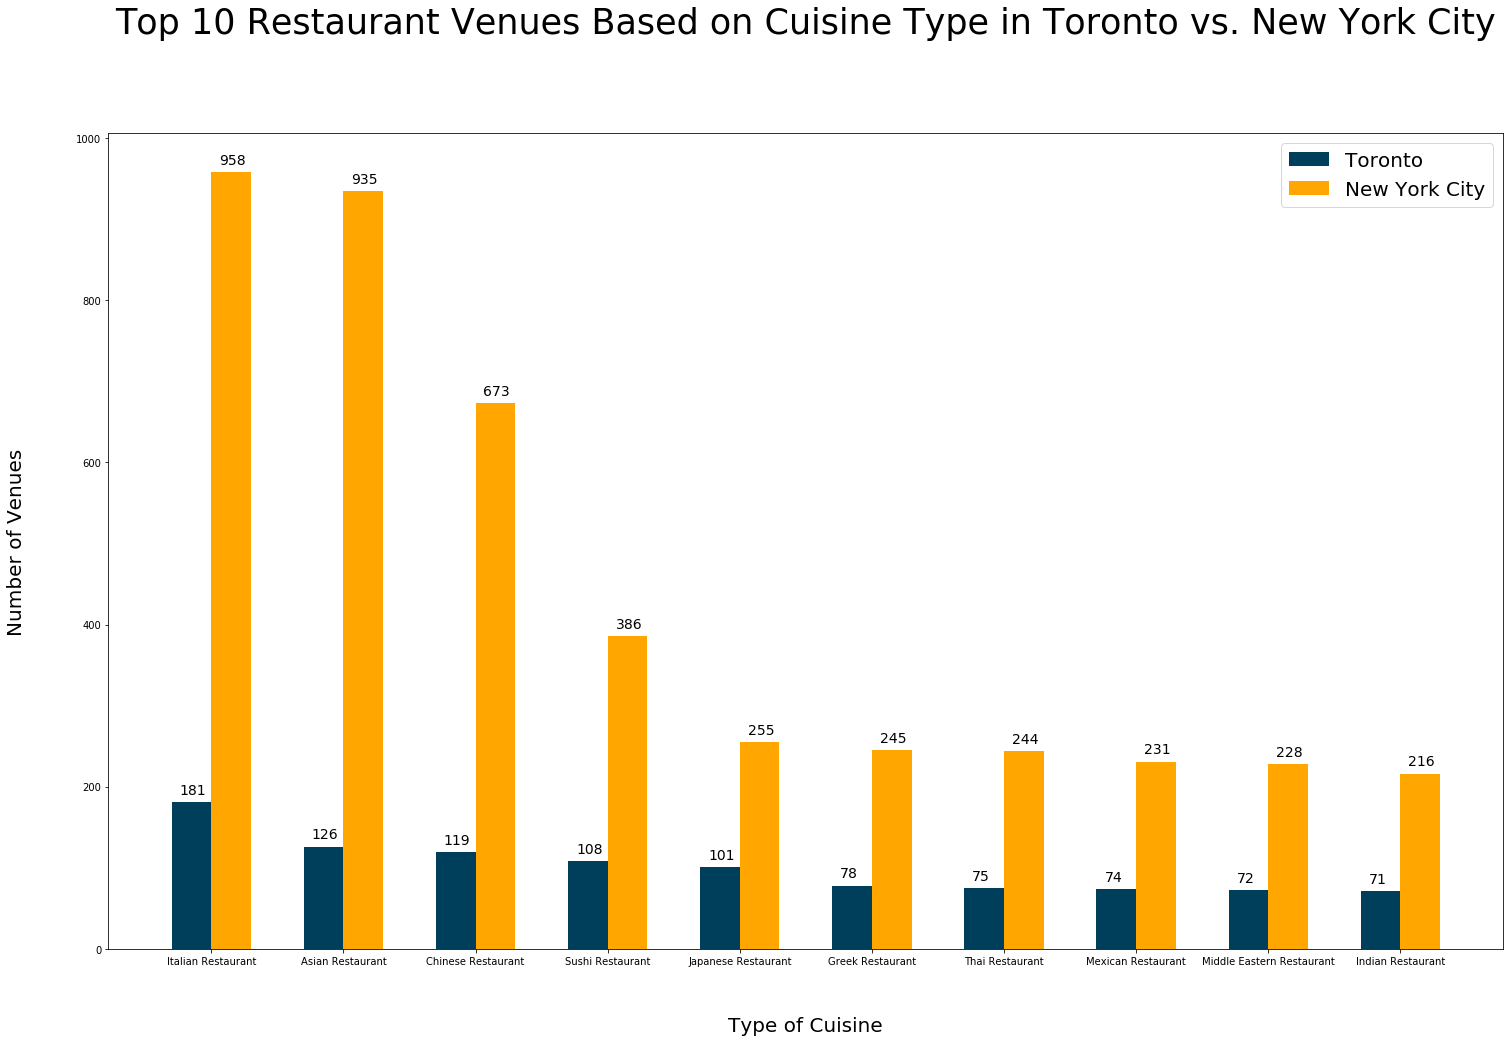

In [0]:
color_list = ['#003f5c', '#ffa600']
N= 10

ind = np.arange(N)

font = {'size': 14}

plt.figure(figsize=(25, 15)) 
p1 = plt.bar(ind-0.15, df_merge_restaurants.nlargest(10, 'Toronto Restaurants')['Toronto Restaurants'].tolist(), color=color_list[0], width=0.3)
p2 = plt.bar(ind+0.15, df_merge_restaurants.nlargest(10, 'New York City Restaurants')['New York City Restaurants'].tolist(), color=color_list[1], width= 0.3)

for bars in p1.patches:
  plt.text(bars.get_x() + 0.06, bars.get_height() + 10, str(int(bars.get_height())), fontdict = font)

for bars in p2.patches:
  plt.text(bars.get_x() + 0.06, bars.get_height() + 10, str(int(bars.get_height())), fontdict = font)

plt.xticks(ind, df_merge_restaurants['CategoryID'].head(10))
plt.ylabel('Number of Venues', fontsize = 20, labelpad = 50)
plt.xlabel('Type of Cuisine', fontsize = 20, labelpad = 50)
plt.title('Top 10 Restaurant Venues Based on Cuisine Type in Toronto vs. New York City', fontsize = 35, pad = 100)
plt.legend((p1, p2), ('Toronto', 'New York City'), fontsize = 20)


plt.show()

<br/>

## __Apply K Means Clustering to Restaurant Venues in TORONTO__ *Analysis*

<br/>

___

<br/>

### Create DataFrame from Toronto Data (has all the columns) and Remove certain Venue Categories from str.

<br/>

In [0]:
toronto_venues_analysis = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant", "Place")]
toronto_venues_analysis = toronto_venues_analysis[~toronto_venues_analysis['Venue Category'].str.contains('Food')]

<br/>

### Group the DataFrame based on Neighborhood and count the values of the other corresponding columns

<br/>

In [0]:
toronto_venues_analysis.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue CategoryID,Venue Category
Neighborhood,,,,,,,
Agincourt,4,4,4,4,4,4,4
Bayview Village,3,3,3,3,3,3,3
Berczy Park,43,43,43,43,43,43,43
Canada Post Gateway Processing Centre,3,3,3,3,3,3,3
Cedarbrae,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
"Wilson Heights, Downsview North, Bathurst Manor",4,4,4,4,4,4,4
Woburn,3,3,3,3,3,3,3
Woodbine Heights,2,2,2,2,2,2,2


<br/>

### Reorganize __toronto_venues__

<br/>

In [0]:
toronto_venues_fix = pd.get_dummies(toronto_venues_analysis[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_venues_fix['Neighborhood'] = toronto_venues_analysis['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_venues_fix.columns[-1]] + list(toronto_venues_fix.columns[:-1])
toronto_venues_fix = toronto_venues_fix[fixed_columns]

toronto_venues_fix.head()

,Neighborhood,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Brazilian Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Hungarian Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,North Indian Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<br/>

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

<br/>

In [0]:
toronto_grouped = toronto_venues_fix.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Brazilian Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Hungarian Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,North Indian Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.25,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,Bayview Village,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,Berczy Park,0.0,0.069767,0.0,0.023256,0.0,0.0,0.0,0.069767,0.0,0.0,0.0,0.00,0.023256,0.0,0.0,0.069767,0.0,0.069767,0.00,0.0,0.0,0.0,0.0,0.046512,0.0,0.186047,0.046512,0.000000,0.00,0.0,0.023256,0.046512,0.046512,0.023256,0.023256,0.00,0.0,0.023256,0.023256,0.0,0.0,0.0,0.0,0.139535,0.0,0.023256,0.023256,0.0,0.0,0.0,0.0
3,Canada Post Gateway Processing Centre,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.333333,0.333333,0.333333,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,Cedarbrae,0.0,0.000000,0.0,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"Wilson Heights, Downsview North, Bathurst Manor",0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,Woburn,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.333333,0.00,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
78,Woodbine Heights,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.50,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
79,"York University, Northwood Park",0.0,0.000000,0.0,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.500000,0

<br/>

### Print each neighborhood along with the top 5 most common venues

<br/>

In [0]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0          Korean Restaurant  0.25
1  Latin American Restaurant  0.25
2         Chinese Restaurant  0.25
3       Pakistani Restaurant  0.25
4      Portuguese Restaurant  0.00


----Bayview Village----
                       venue  freq
0        Japanese Restaurant  0.33
1           Asian Restaurant  0.33
2         Chinese Restaurant  0.33
3      Portuguese Restaurant  0.00
4  Latin American Restaurant  0.00


----Berczy Park----
                venue  freq
0  Italian Restaurant  0.19
1    Sushi Restaurant  0.14
2    Asian Restaurant  0.07
3    Greek Restaurant  0.07
4  Chinese Restaurant  0.07


----Canada Post Gateway Processing Centre----
                       venue  freq
0   Mediterranean Restaurant  0.33
1         Mexican Restaurant  0.33
2  Middle Eastern Restaurant  0.33
3     Argentinian Restaurant  0.00
4      Portuguese Restaurant  0.00


----Cedarbrae----
                    venue  freq
0    Caribbean Restaurant  0.50
1   

<br/> 

### Define function __return_most_common_venues__ to sort the venues in descending order

<br/>

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<br/>

### Create the new dataframe, __neighborhoods_venues_sorted__, and display the top 10 venues for each neighborhood.

<br/>

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

# find the top 10 venues for each Neighborhood group and populate the associated column
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

<br/> 

### Begin Clustering the Data from the Dataframe, __neighborhoods_venues_sorted__ Find optimal k using Average Silhouette Method and the Elbow Method (Sum of Squared Estimate of Errors)

<br/>

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k_max = range(2,30)
sse = []

for k in k_max:
  toronto_grouped_neighborhood=toronto_grouped['Neighborhood']
  toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
  kmeans = KMeans(n_clusters=k, random_state=0)   # run k-means clustering
  preds = kmeans.fit_predict(toronto_grouped_clustering)
  score = silhouette_score(toronto_grouped_clustering, preds)
  print("For n_clusters = {}, silhouette score is {})".format(k, score)) # Run Average Silhouette Score Method to find optimal k
  pred_fit = kmeans.fit(toronto_grouped_clustering)
  sse.append(pred_fit.inertia_) # Using SSE for Elbow Method to find optimal k (This doesn't give good k value)

best_score_toronto = 16 # Looking at Outputs



For n_clusters = 2, silhouette score is 0.18181670576144615)
For n_clusters = 3, silhouette score is 0.16101978674414447)
For n_clusters = 4, silhouette score is 0.1811081055544457)
For n_clusters = 5, silhouette score is 0.198697015603532)
For n_clusters = 6, silhouette score is 0.20980834540037402)
For n_clusters = 7, silhouette score is 0.14953482559056946)
For n_clusters = 8, silhouette score is 0.1627623944944689)
For n_clusters = 9, silhouette score is 0.1699978245687215)
For n_clusters = 10, silhouette score is 0.19605143558995267)
For n_clusters = 11, silhouette score is 0.15806579233847443)
For n_clusters = 12, silhouette score is 0.16159370967540584)
For n_clusters = 13, silhouette score is 0.17199559857441618)
For n_clusters = 14, silhouette score is 0.2127662893700734)
For n_clusters = 15, silhouette score is 0.22908438725144234)
For n_clusters = 16, silhouette score is 0.23377914836120045)
For n_clusters = 17, silhouette score is 0.14339272809552914)
For n_clusters = 18, s

<br/>

### Graph K values vs SSE for Elbow Method (This does not produce any optimal k)

<br/>

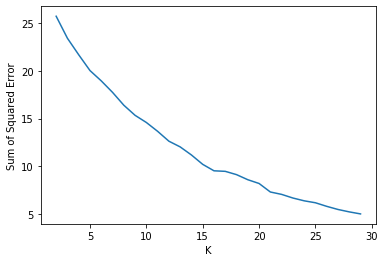

In [0]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_max, sse)

<br/>

### Print the Labels for the Optimal K (k = 16) for K Means Clustering

<br/>

In [0]:
toronto_grouped_neighborhood=toronto_grouped['Neighborhood']
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=best_score_toronto, random_state=0).fit(toronto_grouped_clustering)   # run k-means clustering
kmeans.labels_[0:10] 

print(kmeans.labels_)

[ 3  4  3  7  6  3  3  3  7  3  1  7  1  2  4 10 14  0  3  3  3  3  7  3
  3  8  4  4  3 10  5  3  3  8  7  3  8  7  3  3  1  3  3  3  3 11  6 14
  9 13  3  3 11  3  3  3  1  3  3 10  3  8  8  3  3  3  3  3  3 14 12  8
  3  8 15  3  3  2  1  6  1]


<br/>

### Insert the Cluster Labels in to the DataFrame, __toronto_grouped_clustering__

<br/>

In [0]:
toronto_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_grouped_clustering

,Cluster Labels,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Brazilian Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Hungarian Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,North Indian Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.25,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,4,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,3,0.0,0.069767,0.0,0.023256,0.0,0.0,0.0,0.069767,0.0,0.0,0.0,0.00,0.023256,0.0,0.0,0.069767,0.0,0.069767,0.00,0.0,0.0,0.0,0.0,0.046512,0.0,0.186047,0.046512,0.000000,0.00,0.0,0.023256,0.046512,0.046512,0.023256,0.023256,0.00,0.0,0.023256,0.023256,0.0,0.0,0.0,0.0,0.139535,0.0,0.023256,0.023256,0.0,0.0,0.0,0.0
3,7,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.333333,0.333333,0.333333,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.333333,0.00,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
78,1,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.50,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
79,6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0

<br/>

### Create a new dataframe, __toronto_merged__ that includes the cluster as well as the top 10 venues for each neighborhood.

<br/>

In [0]:
toronto_grouped_clustering['Neighborhood'] = toronto_grouped_neighborhood
toronto_merged = df_postal_codes.join(toronto_grouped_clustering.set_index('Neighborhood'), on='Neighbourhood',how = 'inner')
toronto_merged

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Brazilian Restaurant,Burmese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Hungarian Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,North Indian Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,14,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,3,0.0,0.076923,0.0,0.0,0.000000,0.0,0.000000,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076923,0.0,0.076923,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.153846,0.076923,0.000000,0.000000,0.0,0.153846,0.153846,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.076923,0.000000,0.000000,0.076923,0.0,0.000000,0.000000,0.000000
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,10,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,3,0.0,0.046512,0.0,0.0,0.000000,0.0,0.000000,0.116279,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.046512,0.0,0.023256,0.000000,0.0,0.0,0.046512,0.0,0.069767,0.093023,0.023256,0.000000,0.0,0.046512,0.046512,0.116279,0.0,0.0,0.0,0.0,0.000000,0.023256,0.046512,0.000000,0.0,0.0,0.139535,0.046512,0.000000,0.069767,0.0,0.000000,0.000000,0.000000
5,M9A,Queen's Park,Queen's Park,43.667856,-79.532242,3,0.0,0.046512,0.0,0.0,0.000000,0.0,0.000000,0.116279,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.046512,0.0,0.023256,0.000000,0.0,0.0,0.046512,0.0,0.069767,0.093023,0.023256,0.000000,0.0,0.046512,0.046512,0.116279,0.0,0.0,0.0,0.0,0.000000,0.023256,0.046512,0.000000,0.0,0.0,0.139535,0.046512,0.000000,0.069767,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,M8W,Etobicoke,"Long Branch, Alderwood",43.602414,-79.543484,3,0.0,0.200000,0.0,0.0,0.000000,0.2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.2,0.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000
96,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.083333,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.083333,0.0,0.166667,0.083333,0

<br/>

### Visualize the Clusters in Toronto by plotting a Folium Map

<br/>

In [0]:
import folium

map_clusters_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='b',
        fill=True,
        fill_color='b',
        fill_opacity=0.7).add_to(map_clusters_toronto)
       
map_clusters_toronto

<br/>

## __Apply K Means Clustering to Restaurant Venues in NEW YORK CITY__ *Analysis*

<br/>

___

<br/>

### Create DataFrame from New York City Data (has all the columns) and Remove certain Venue Categories from str.

<br/>

In [0]:
newyorkcity_venues_analysis = newyorkcity_venues[newyorkcity_venues['Venue Category'].str.contains("Restaurant", "Place")]
newyorkcity_venues_analysis = newyorkcity_venues_analysis[~newyorkcity_venues_analysis['Venue Category'].str.contains('Food')]

<br/>

### Group the DataFrame based on Neighborhood and count the values of the other corresponding columns

<br/>

In [0]:
newyorkcity_venues_analysis.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue CategoryID,Venue Category
Neighborhood,,,,,,,
Allerton,9,9,9,9,9,9,9
Annadale,2,2,2,2,2,2,2
Arlington,2,2,2,2,2,2,2
Arrochar,9,9,9,9,9,9,9
Arverne,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Woodhaven,18,18,18,18,18,18,18
Woodlawn,2,2,2,2,2,2,2
Woodrow,4,4,4,4,4,4,4


<br/>

### Reorganize __newyorkcity_venues__

<br/>

In [0]:
newyorkcity_venues_fix = pd.get_dummies(newyorkcity_venues_analysis[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyorkcity_venues_fix['Neighborhood'] = newyorkcity_venues_analysis['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyorkcity_venues_fix.columns[-1]] + list(newyorkcity_venues_fix.columns[:-1])
newyorkcity_venues_fix = newyorkcity_venues_fix[fixed_columns]

newyorkcity_venues_fix.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Wakefield,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Co-op City,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Eastchester,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Eastchester,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<br/>

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

<br/>

In [0]:
newyorkcity_grouped = newyorkcity_venues_fix.groupby('Neighborhood').mean().reset_index()
newyorkcity_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Allerton,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,...,0.000000,0.222222,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.222222,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
1,Annadale,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
2,Arlington,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
3,Arrochar,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.000000,...,0.222222,0.111111,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
4,Arverne,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0

<br/>

### Print each neighborhood along with the top 5 most common venues

<br/>

In [0]:
num_top_venues = 5

for hood in newyorkcity_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyorkcity_grouped[newyorkcity_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                 venue  freq
0   Chinese Restaurant  0.44
1   Mexican Restaurant  0.22
2   Spanish Restaurant  0.22
3   Italian Restaurant  0.11
4  American Restaurant  0.00


----Annadale----
                 venue  freq
0   Italian Restaurant   0.5
1     Sushi Restaurant   0.5
2  American Restaurant   0.0
3   Persian Restaurant   0.0
4   Russian Restaurant   0.0


----Arlington----
                     venue  freq
0     Caribbean Restaurant   0.5
1      Peruvian Restaurant   0.5
2       Persian Restaurant   0.0
3  Scandinavian Restaurant   0.0
4       Russian Restaurant   0.0


----Arrochar----
                       venue  freq
0         Italian Restaurant  0.33
1   Mediterranean Restaurant  0.22
2         Mexican Restaurant  0.11
3  Middle Eastern Restaurant  0.11
4          Polish Restaurant  0.11


----Arverne----
                    venue  freq
0         Thai Restaurant   1.0
1  Peking Duck Restaurant   0.0
2      Russian Restaurant   0.0
3     Romanian Restaura

<br/>

### Create the new dataframe, __neighborhoods_venues_sorted__, and display the top 10 venues for each neighborhood.

<br/>

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyorkcity_grouped['Neighborhood']

# find the top 10 venues for each Neighborhood group and populate the associated column
for ind in np.arange(newyorkcity_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyorkcity_grouped.iloc[ind, :], num_top_venues)

<br/> 

### Begin Clustering the Data from the Dataframe, __neighborhoods_venues_sorted__ Find optimal k using Average Silhouette Method and the Elbow Method (Sum of Squared Estimate of Errors)

<br/>

In [0]:
k_max = range(2,30)
sse = []

for k in k_max:
  newyorkcity_grouped_neighborhood=newyorkcity_grouped['Neighborhood']
  newyorkcity_grouped_clustering = newyorkcity_grouped.drop('Neighborhood', 1)
  kmeans = KMeans(n_clusters=k, random_state=0)   # run k-means clustering
  preds = kmeans.fit_predict(newyorkcity_grouped_clustering)
  score = silhouette_score(newyorkcity_grouped_clustering, preds)
  print("For n_clusters = {}, silhouette score is {})".format(k, score)) # Run Average Silhouette Score Method to find optimal k
  pred_fit = kmeans.fit(newyorkcity_grouped_clustering)
  sse.append(pred_fit.inertia_) # Using SSE for Elbow Method to find optimal k (This doesn't give good k value)

best_score_newyorkcity = 14 # Looking at Outputs



For n_clusters = 2, silhouette score is 0.16115139610285012)
For n_clusters = 3, silhouette score is 0.13581668991370718)
For n_clusters = 4, silhouette score is 0.16806528459987446)
For n_clusters = 5, silhouette score is 0.16858176672930517)
For n_clusters = 6, silhouette score is 0.1547261626202788)
For n_clusters = 7, silhouette score is 0.15940231640667918)
For n_clusters = 8, silhouette score is 0.1488501506234764)
For n_clusters = 9, silhouette score is 0.14826406708905746)
For n_clusters = 10, silhouette score is 0.16263380201661579)
For n_clusters = 11, silhouette score is 0.16703829398134032)
For n_clusters = 12, silhouette score is 0.1688538008089923)
For n_clusters = 13, silhouette score is 0.18491680315778786)
For n_clusters = 14, silhouette score is 0.18735323400143686)
For n_clusters = 15, silhouette score is 0.17119461417447626)
For n_clusters = 16, silhouette score is 0.16519071779174707)
For n_clusters = 17, silhouette score is 0.16224580910453698)
For n_clusters = 18

<br/>

### Graph K values vs SSE for Elbow Method (This does not produce any optimal k)

<br/>

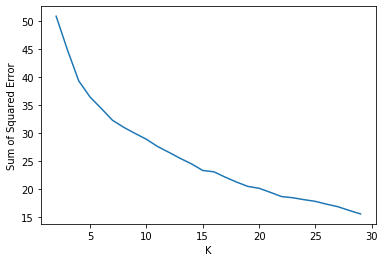

In [0]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_max, sse)

<br/>

### Print the Labels for the Optimal K (k = 14) for K Means Clustering

<br/>

In [0]:
newyorkcity_grouped_neighborhood=newyorkcity_grouped['Neighborhood']
newyorkcity_grouped_clustering = newyorkcity_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=best_score_newyorkcity, random_state=0).fit(newyorkcity_grouped_clustering)   # run k-means clustering
kmeans.labels_[0:10] 

print(kmeans.labels_)

[10  1  6  5  5  5  0  5 10  5  5  2  9  5  4  9  0  0  0  0  2  0 11  3
  5  5  4  5  4 10  5  9  0  4  6 10  5  5  3  5 10  5  5  5  5 10  5  9
  3  4  5  5  9  5 10  0 10  4  6  4  0  5  3 10  0  5  5  5  5  3  9  4
 10  3  5  4  6 10  7  0  2  2  4  1  6  9  5  4  5  6 12 10 10  5  5  5
  0  9  9  5  0 13  4  9  5  5 10  2  0  5  5  5  4  7  2 10  3  2 10 10
  0  2  5  5  5  4  4  3 10 12 10  4  0  1 10  4  6 10  5  2  5  0  5  5
  5  4  5  0  3  0  5 10  8 10  9  2  0 10 10  4  5  5  5  0  5 10 10  9
 10 10 10  5  8  5  2 10  0  5  3  0  5 10 10  4  1  0  6 10  7  5 10  5
 10  0  2  4  3  4  0  5 10  6  3 10 10 10  4  5  7 10  2  4  5  6  3 10
  5  0  6  0  9  8  4  0  2  5  9  6  5  9  5  6  0  4  7  5  5  5  5  4
  5  0  4  2  2  5  5  5 10 10  5  5  5 10 10  6  4  9  5  9  5 10  1  6
 10  8  5 10  4 12  0  5  5]


<br/>

### Insert the Cluster Labels in to the DataFrame, __newyorkcity_grouped_clustering__

<br/>

In [0]:
newyorkcity_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
newyorkcity_grouped_clustering

,Cluster Labels,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,10,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,...,0.000000,0.222222,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.222222,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
1,1,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
2,6,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
3,5,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.000000,...,0.222222,0.111111,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
4,5,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...

<br/>

### Create a new dataframe, __newyorkcity_merged__ that includes the cluster as well as the top 10 venues for each neighborhood.

<br/>

In [0]:
newyorkcity_grouped_clustering['Neighborhood'] = newyorkcity_grouped_neighborhood
newyorkcity_merged = df_newyorkcity.join(newyorkcity_grouped_clustering.set_index('Neighborhood'), on='Neighborhood',how = 'inner')
newyorkcity_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Bronx,Wakefield,40.894705,-73.847201,6,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,9,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bronx,Eastchester,40.887556,-73.827806,6,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.00,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Bronx,Kingsbridge,40.881687,-73.902818,10,0.00,0.0,0.0,0.040,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0.0,0.160000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Manhattan,Marble Hill,40.876551,-73.910660,10,0.00,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.250000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Brooklyn,Erasmus,40.646926,-73.948177,6,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.166667,0.0,0

<br/>

### Visualize the Clusters in New York City by plotting a Folium Map

<br/>

In [0]:
map_clusters_newyorkcity = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyorkcity_merged['Latitude'], newyorkcity_merged['Longitude'], newyorkcity_merged['Neighborhood'], newyorkcity_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='b',
        fill=True,
        fill_color='b',
        fill_opacity=0.7).add_to(map_clusters_newyorkcity)
       
map_clusters_newyorkcity

# __The Battle of Neighborhoods__ *Conclusion*

<br/>

Overall, the question on whether Toronto or New York City is more diverse in terms of having a multicultural background can be easily deduced from the data analysis, data visualizations, and data observations. The fact that New York City has more unique types of cuisines and that is has much more venues for restaurants in ratio to Toronto's population, New York City is more diverse in terms of having a multicultural background.

<br/>

___

<br/>
